# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize

In [2]:
RANDOM_STATE = 42

In [3]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None, index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
dataset.dtypes

1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19    object
dtype: object

In [5]:
data = dataset.loc[:, dataset.columns.drop(19)].values
target = dataset[19].values
print(data.shape, target.shape)

(846, 18) (846,)


In [6]:
np.unique(target)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_STATE)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(634, 18) (634,) (212, 18) (212,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [8]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197
1,88,34,69,152,57,5,138,48,18,122,158,284,120,62,9,29,204,210
2,91,39,77,153,59,8,139,48,18,139,159,289,123,62,8,17,201,209
3,94,37,72,193,72,6,158,41,19,133,184,385,127,70,0,14,200,204
4,103,41,83,194,63,9,175,38,21,142,199,455,138,65,7,30,197,206
5,115,51,100,201,60,12,196,34,23,162,207,573,184,62,22,1,198,208
6,104,55,107,222,68,11,218,31,24,173,232,703,229,71,3,10,188,199
7,98,46,88,191,63,6,192,34,22,147,215,563,174,73,2,26,194,197
8,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
9,101,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192


Methods `describe` and `info` deliver some useful information.

In [9]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,634.000000,634.000000,634.000000,634.00000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,93.632492,44.812303,82.164038,169.83123,62.047319,8.757098,168.195584,41.052050,20.525237,147.821767,188.015773,436.085174,174.242902,72.301262,6.492114,12.906940,189.119874,195.990536
std,8.199080,6.174230,15.708187,34.27523,8.509318,5.169878,32.575341,7.767889,2.525727,14.710522,31.009244,172.191466,32.284493,7.785377,5.003705,8.964341,6.289600,7.377643
min,73.000000,33.000000,42.000000,104.00000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,88.000000,40.000000,70.000000,141.00000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,168.50000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,98.000000,195.75000,65.750000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,582.000000,197.000000,75.000000,9.750000,19.000000,194.000000,201.000000
max,119.000000,59.000000,110.000000,333.00000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       634 non-null    int64
 1   1       634 non-null    int64
 2   2       634 non-null    int64
 3   3       634 non-null    int64
 4   4       634 non-null    int64
 5   5       634 non-null    int64
 6   6       634 non-null    int64
 7   7       634 non-null    int64
 8   8       634 non-null    int64
 9   9       634 non-null    int64
 10  10      634 non-null    int64
 11  11      634 non-null    int64
 12  12      634 non-null    int64
 13  13      634 non-null    int64
 14  14      634 non-null    int64
 15  15      634 non-null    int64
 16  16      634 non-null    int64
 17  17      634 non-null    int64
dtypes: int64(18)
memory usage: 89.3 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1. Remove strongly correlated features
Because we want to use logistic regression (which based on linear regression, we remember about some problems that gives us the correlated features - can cause overfitting and instability). So, let's check the correlation of features.

Text(0.5, 1.0, 'Correlation')

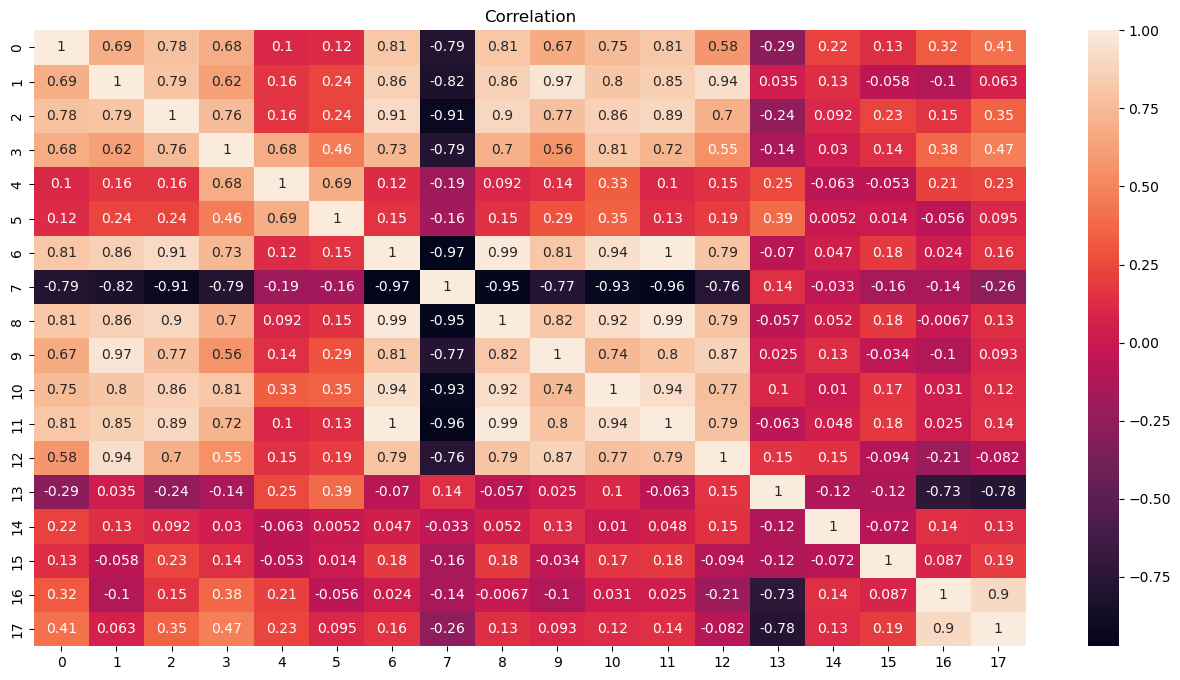

In [12]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

Let's choose the most correlated features and drop them from our dataset.

In [13]:
threshold = 0.95

corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dropped = [column for column in upper_tr.columns if any(upper_tr[column] > threshold)]

X_train = pd.DataFrame(X_train).drop(dropped, axis=1, inplace=False)
X_test = pd.DataFrame(X_test).drop(dropped, axis=1, inplace=False)

In [14]:
dropped

[7, 8, 9, 11]

Text(0.5, 1.0, 'Correlation')

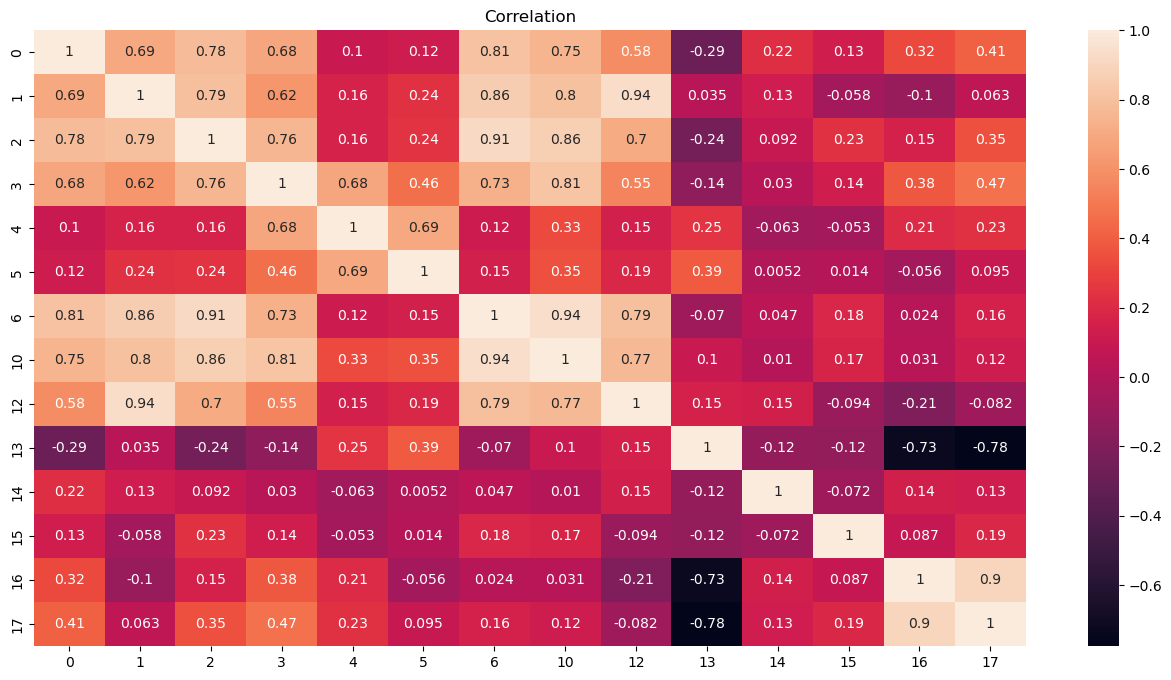

In [15]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

##### 2.0.2. Removing outliers
Below we will use logistic regression with MSE, so MSE is quite sensitive about outliers. To get better classifier we need to drop outliers.

In [16]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [17]:
# create mask
mask = yhat != -1

In [18]:
# remove all rows that are outliers
X_train, y_train = X_train.to_numpy()[mask, :], y_train[mask]

In [19]:
(X_train.shape, y_train.shape)

((613, 14), (613,))

##### 2.0.3. Normalization
Because we will be using logistic regression classificator, we need to normalize our dataset (in order to avoid gradient explosion).

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02
mean,-6.867807e-16,4.781385e-17,6.085399e-17,-7.534303e-17,5.737662e-16,1.159124e-16,-1.912554e-16,4.462626e-16,9.128098e-17,-8.765872e-16,-9.852550e-17,1.072189e-16,1.434415e-16,-1.382255e-15
std,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00,1.000817e+00
min,-2.548047e+00,-1.909904e+00,-2.546580e+00,-1.993594e+00,-2.416837e+00,-2.664604e+00,-1.713782e+00,-1.954681e+00,-1.958046e+00,-2.045721e+00,-1.296630e+00,-1.430243e+00,-2.121737e+00,-2.113490e+00
25%,-7.996390e-01,-7.552974e-01,-7.539581e-01,-8.730827e-01,-8.004363e-01,-5.482497e-01,-6.729590e-01,-6.641143e-01,-7.957641e-01,-7.445257e-01,-8.992126e-01,-7.637747e-01,-6.877515e-01,-5.936796e-01
50%,-5.032123e-02,-9.552211e-02,-1.777582e-01,-6.382465e-02,-8.203593e-02,-1.249788e-01,-3.151759e-01,-3.056236e-01,1.137634e-02,-9.392805e-02,-1.043787e-01,-2.083846e-01,-5.042472e-02,9.714347e-02
75%,6.989965e-01,7.291969e-01,9.106193e-01,8.076840e-01,6.363644e-01,7.215629e-01,9.208019e-01,1.020792e+00,7.216600e-01,5.566696e-01,6.904553e-01,6.802397e-01,7.462338e-01,6.498019e-01
max,3.196722e+00,2.378635e+00,1.806930e+00,2.052696e+00,2.432365e+00,7.070626e+00,2.254357e+00,2.526453e+00,2.594226e+00,2.996411e+00,3.074957e+00,3.123956e+00,2.658214e+00,2.031448e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [24]:
logreg = LogisticRegression(solver='saga', tol=1e-3, max_iter=500)

In [26]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 1.0, 10]
}
grid_cv = GridSearchCV(logreg, 
                       param_grid=param_grid, 
                       scoring=['accuracy', 'f1_weighted'], 
                       cv=10, 
                       refit=False,
                       verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.01, 0.1, 1.0, 10], 'penalty': ['l1', 'l2']},
             refit=False, scoring=['accuracy', 'f1_weighted'], verbose=1)

In [27]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

4 4


In [28]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7748810153358011 0.7700696538295158


In [29]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
logreg.set_params(**best_params_lr)

LogisticRegression(max_iter=500, penalty='l1', solver='saga', tol=0.001)

In [30]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

In [31]:
name_classes = np.unique(target)
print(name_classes)
n_classes = len(name_classes)
y_test_bin = label_binarize(y_test, classes=name_classes)

['bus' 'opel' 'saab' 'van']


In [32]:
def plot_roc_curve(y_test, y_pred, n_classes):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(name_classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

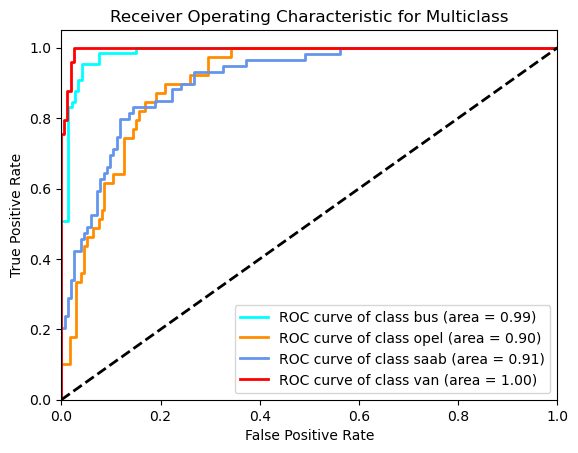

In [33]:
plot_roc_curve(y_test_bin, y_pred, n_classes)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Use our pre-processed data in PCA

In [35]:
pca = PCA()
pca.fit_transform(X_train)

array([[ 4.02905808e+00, -1.40953206e+00,  5.99519349e-02, ...,
         2.72604427e-02,  1.01350075e-01, -1.20779058e-01],
       [-1.78079098e+00,  4.35047300e+00,  7.93006412e-01, ...,
         8.44123041e-02,  3.41202498e-02,  1.27096406e-01],
       [-9.54661447e-01,  3.55333024e+00, -6.26085416e-03, ...,
        -1.77818363e-01,  3.22064458e-02, -2.79660704e-02],
       ...,
       [-2.26175841e+00, -1.93748766e+00, -9.04403416e-01, ...,
        -1.35499291e-01, -2.73275375e-01,  4.63503583e-02],
       [-2.48391464e+00,  2.66537782e+00,  4.59532172e-01, ...,
         1.20084183e-02, -4.09755137e-03, -6.91021707e-03],
       [-1.49867255e+00,  1.13930292e+00, -1.92509586e+00, ...,
        -2.41634990e-01, -6.63014110e-02, -1.04782334e-01]])

Text(0, 0.5, 'explained variance ration')

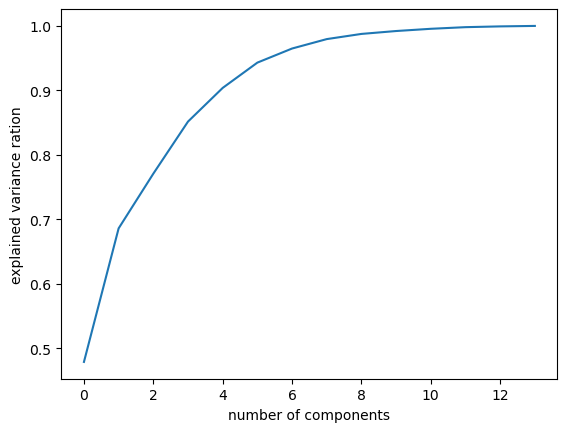

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ration')

In [37]:
X_train.shape[1]

14

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Normalizing data is very important in PCA.  
As we can see from graph above, we need to use 10 principal components to get best result.

In [38]:
pca = PCA(n_components=10)
pca.fit_transform(X_train).shape

(613, 10)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [39]:
pca = PCA(n_components=10)
log_reg = LogisticRegression(solver='saga', tol=1e-3)
estimators = [('pca', pca), ('log_reg', log_reg)]
pipeline = Pipeline(estimators)
pipeline

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg', LogisticRegression(solver='saga', tol=0.001))])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__penalty' : ['l1', 'l2'],
    'log_reg__C' : [0.01, 0.1, 1.0, 10]
}
grid_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=10, refit=False, verbose=1)
grid_cv.fit(X_train, y_train)

In [41]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.33832479377136526 accuracy: 0.3800898995240613 
params: {'log_reg__C': 0.01, 'log_reg__penalty': 'l1'}
f1_weighted: 0.6224349346702318 accuracy: 0.6411951348492861 
params: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2'}
f1_weighted: 0.6798844835218948 accuracy: 0.6933897408778424 
params: {'log_reg__C': 0.1, 'log_reg__penalty': 'l1'}
f1_weighted: 0.6763573356708259 accuracy: 0.6886303543098888 
params: {'log_reg__C': 0.1, 'log_reg__penalty': 'l2'}
f1_weighted: 0.7006300184583132 accuracy: 0.7081173982020095 
params: {'log_reg__C': 1.0, 'log_reg__penalty': 'l1'}
f1_weighted: 0.7076682564544292 accuracy: 0.7162612374405077 
params: {'log_reg__C': 1.0, 'log_reg__penalty': 'l2'}
f1_weighted: 0.7041901497436236 accuracy: 0.7097303014278159 
params: {'log_reg__C': 10, 'log_reg__penalty': 'l1'}
f1_weighted: 0.7033505267308987 accuracy: 0.7097303014278158 
params: {'log_reg__C': 10, 'log_reg__penalty': 'l2'}


In [42]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

5 5


In [43]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7162612374405077 0.7076682564544292


In [44]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
pipeline.set_params(**best_params_lr)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg', LogisticRegression(solver='saga', tol=0.001))])

In [45]:
pipeline.fit(X_train, y_train)
predicted_test = pipeline.predict_proba(X_test)

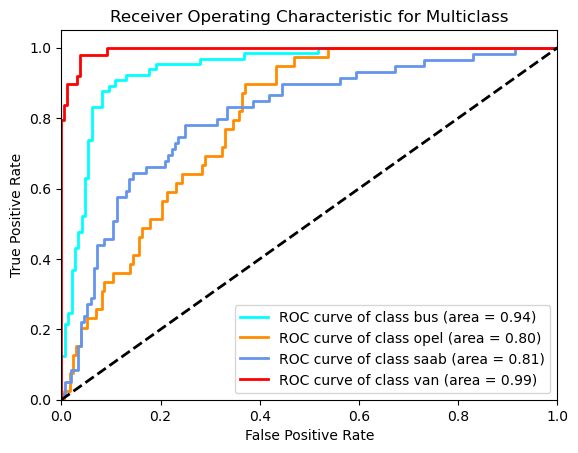

In [46]:
plot_roc_curve(y_test_bin, predicted_test, n_classes)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Since we use desicion tree as classifier, we don't need to normalize, remove correlated features, drop outliers and PCA. Because decision tree analysing features independent at each node.

So, we only need to delete first (index) columns from dataset.

In [47]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data, target, test_size=0.25, random_state=RANDOM_STATE)
print(X_train_dt.shape, y_train_dt.shape, X_test_dt.shape, y_test_dt.shape)

(634, 18) (634,) (212, 18) (212,)


In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid = [
  {'max_depth': [5, 10, 25, 50]}
]
grid_cv = GridSearchCV(dtc, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=5, refit=False, verbose=1)
grid_cv.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [5, 10, 25, 50]}], refit=False,
             scoring=['accuracy', 'f1_weighted'], verbose=1)

In [49]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.6911994937492647 accuracy: 0.7003374578177727 
params: {'max_depth': 5}
f1_weighted: 0.6827126539511856 accuracy: 0.6861392325959255 
params: {'max_depth': 10}
f1_weighted: 0.6974640658227047 accuracy: 0.7018872640919884 
params: {'max_depth': 25}
f1_weighted: 0.7025055977713993 accuracy: 0.7050493688288964 
params: {'max_depth': 50}


In [50]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

3 3


In [51]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7050493688288964 0.7025055977713993


In [52]:
best_params_dt = grid_cv.cv_results_['params'][best_acc_idx]
dtc.set_params(**best_params_dt)

DecisionTreeClassifier(max_depth=50)

In [53]:
dtc.fit(X_train_dt, y_train_dt)
predicted_test = dtc.predict_proba(X_test_dt)

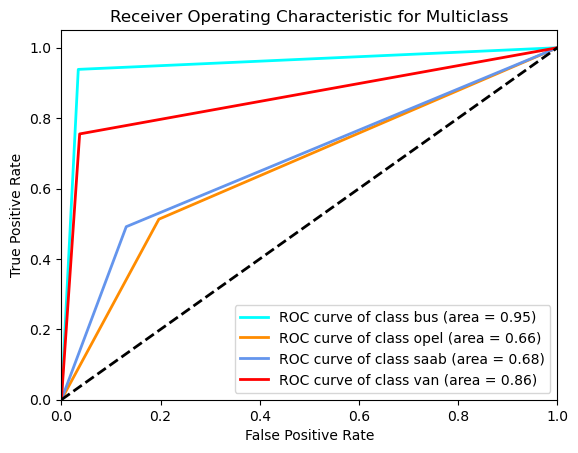

In [54]:
plot_roc_curve(label_binarize(y_test_dt, classes=name_classes), predicted_test, n_classes)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [55]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = X_train, X_test, y_train, y_test  # fully preprocessed data for log_reg

In [56]:
print(f"shapes of data for log_reg: X_train - {X_train_lr.shape}, X_test - {X_test_lr.shape}, y_train - {y_train_lr.shape}, y_test - {y_test_lr.shape},")
print(f"shapes of data for dec_tree: X_train - {X_train_dt.shape}, X_test - {X_test_dt.shape}, y_train - {y_train_dt.shape}, y_test - {y_test_dt.shape},")

shapes of data for log_reg: X_train - (613, 14), X_test - (212, 14), y_train - (613,), y_test - (212,),
shapes of data for dec_tree: X_train - (634, 18), X_test - (212, 18), y_train - (634,), y_test - (212,),


In [57]:
lr = LogisticRegression(solver='saga', tol=1e-3)
dt = DecisionTreeClassifier(max_depth=50)

In [58]:
n_min = 2
n_max = 100
n_step = 5

In [59]:
from sklearn.ensemble import BaggingClassifier

lr_bag = BaggingClassifier(estimator=lr, max_features=X_train_lr.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)
dt_bag = BaggingClassifier(estimator=dt, max_features=X_train_dt.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)

param_grid = {
    'n_estimators': [n for n in range(n_min, n_max + n_step, n_step)],
}

In [ ]:
grid_cv_dt = GridSearchCV(estimator=dt_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=2)
grid_cv_dt.fit(X_train_dt, y_train_dt)

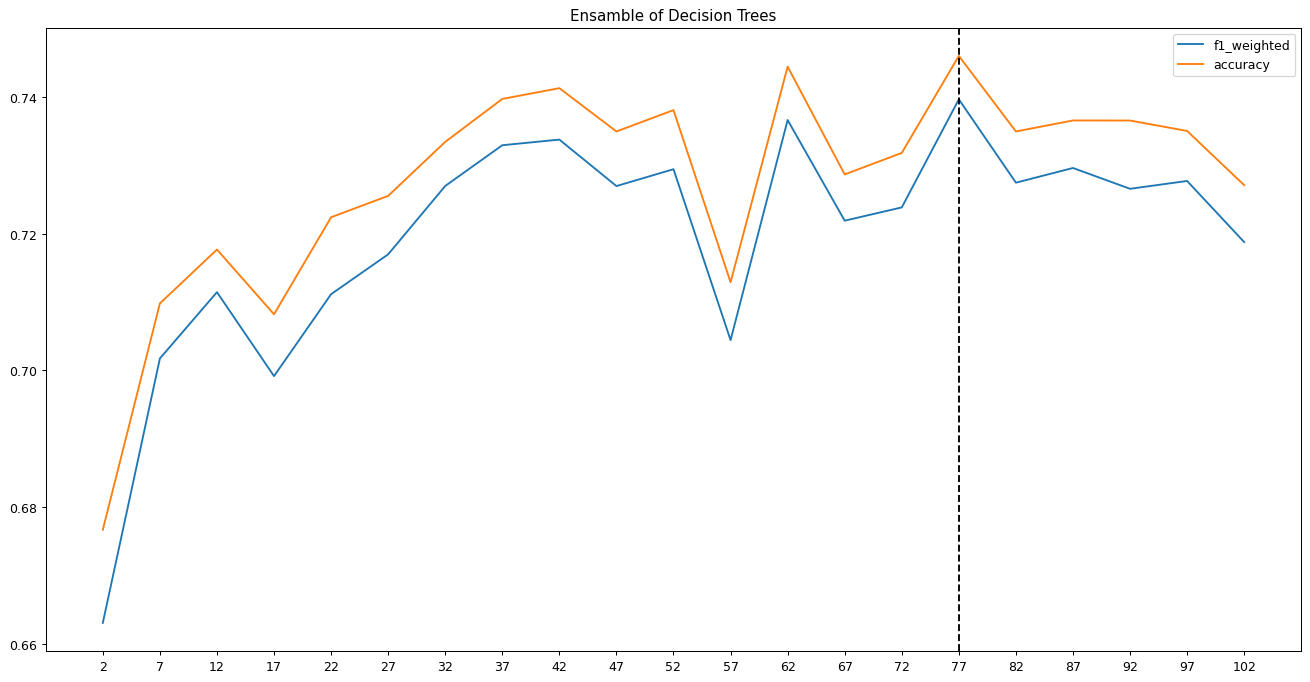

In [61]:
best_param_bagging_dt = grid_cv_dt.param_grid['n_estimators'][
    ((grid_cv_dt.cv_results_['mean_test_f1_weighted'] + grid_cv_dt.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_dt.param_grid['n_estimators'])
plt.axvline(best_param_bagging_dt, linestyle='--', color='black')
plt.title('Ensamble of Decision Trees')
plt.legend()

Optimal number of estimators in bagging for decistion trees is `77`.  
So, the accuracy and f1 metrics are increased with bagging relatively to the simple decision tree with the same hyperparameters.  


In [ ]:
grid_cv_lr = GridSearchCV(estimator=lr_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=1)
grid_cv_lr.fit(X_train_lr, y_train_lr)

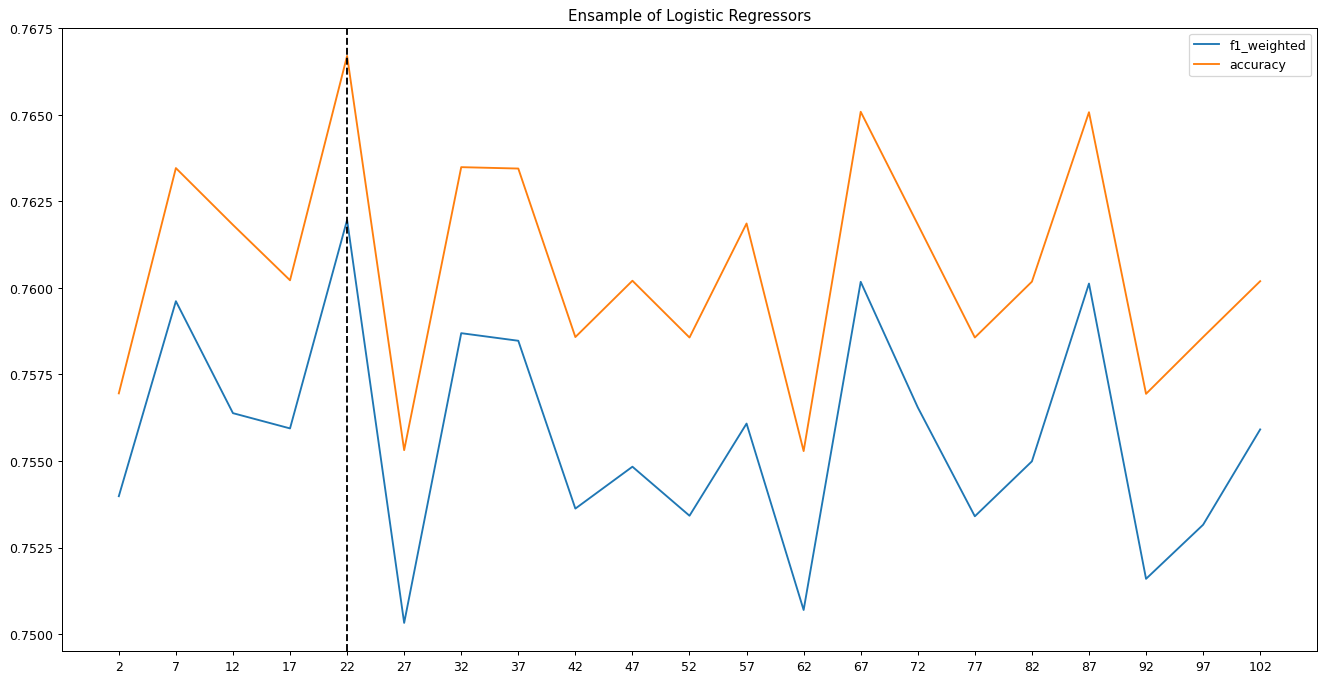

In [63]:
best_param_bagging_lr = grid_cv_lr.param_grid['n_estimators'][
    ((grid_cv_lr.cv_results_['mean_test_f1_weighted'] + grid_cv_lr.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_lr.param_grid['n_estimators'])
plt.axvline(best_param_bagging_lr, linestyle='--', color='black')
plt.title('Ensample of Logistic Regressors')
plt.legend()

The optimal number of estimators in bagging with Logistic Regression is `22`.  
The accuracy and f1 metrics are increased relatively to the single log_reg estimator with the same hyperparameters.  

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

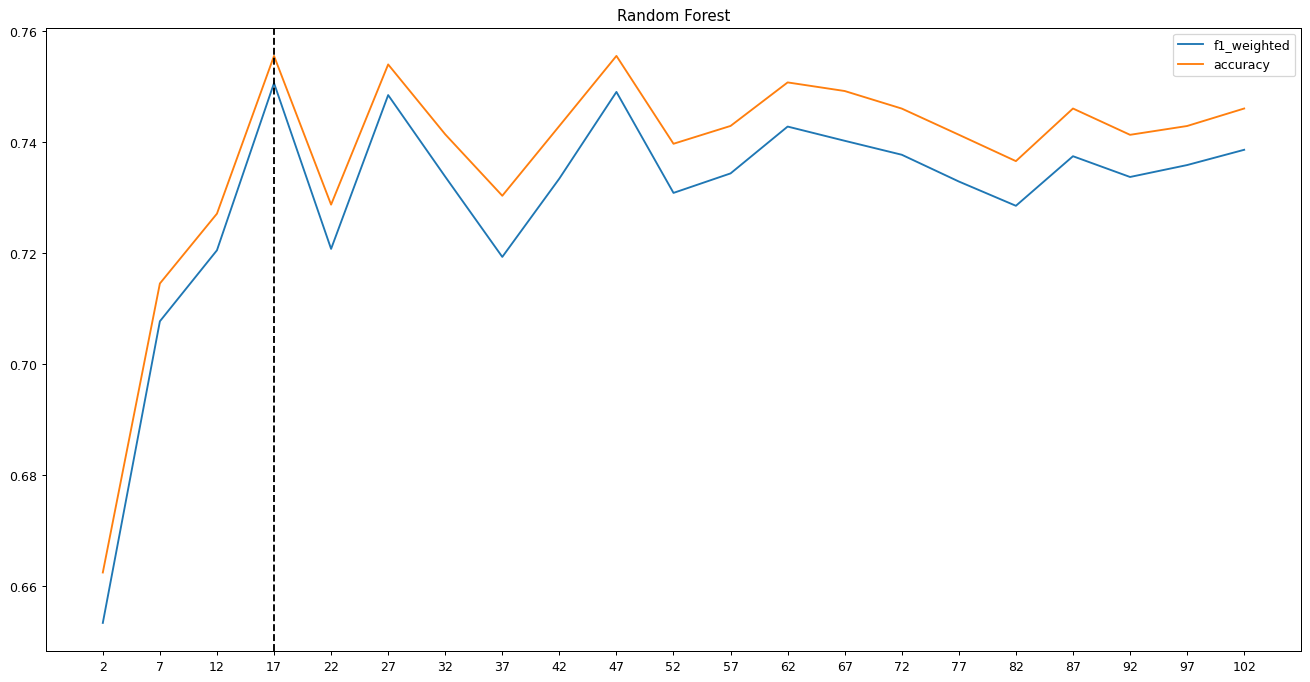

In [65]:
best_param_rf = grid_cv.param_grid['n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv.param_grid['n_estimators'])
plt.axvline(best_param_rf, linestyle='--', color='black')
plt.title('Random Forest')
plt.legend()

The optimal value is `17` - it's different from Bagging.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [66]:
X_train_lr_splits = np.array_split(X_train_lr, 10, axis=0)
y_train_lr_splits = np.array_split(y_train_lr, 10, axis=0)
X_train_lr.shape

(613, 14)

In [68]:
X_train_dt_splits = np.array_split(X_train_dt, 10, axis=0)
y_train_dt_splits = np.array_split(y_train_dt, 10, axis=0)
X_train_dt.shape

(634, 18)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

lr_metrics = np.zeros((10, 2))
dt_metrics = np.zeros((10, 2))
rfc_metrics = np.zeros((10, 2))

for i in range(10):
    lr = LogisticRegression(solver='saga', tol=1e-3)
    dt = DecisionTreeClassifier(max_depth=50)
    rfc = RandomForestClassifier(n_estimators=17)
    
    lr.fit(X_train_lr_splits[i], y_train_lr_splits[i])
    dt.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    rfc.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    
    lr_pred = lr.predict(X_test_lr)
    dt_pred = dt.predict(X_test_dt)
    rfc_pred = rfc.predict(X_test_dt)
    
    lr_metrics[i] = [f1_score(y_test_lr, lr_pred, average='weighted'), accuracy_score(y_test_lr, lr_pred)]
    dt_metrics[i] = [f1_score(y_test_dt, dt_pred, average='weighted'), accuracy_score(y_test_dt, dt_pred)]
    rfc_metrics[i] = [f1_score(y_test_dt, rfc_pred, average='weighted'), accuracy_score(y_test_dt, rfc_pred)]

In [70]:
x_ticks_lr = np.zeros(10)
x_ticks_lr[0] = X_train_lr_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_lr[i] = X_train_lr_splits[i].shape[0] + x_ticks_lr[i-1]

x_ticks_dt_rfc = np.zeros(10)
x_ticks_dt_rfc[0] = X_train_dt_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_dt_rfc[i] = X_train_dt_splits[i].shape[0] + x_ticks_dt_rfc[i-1]

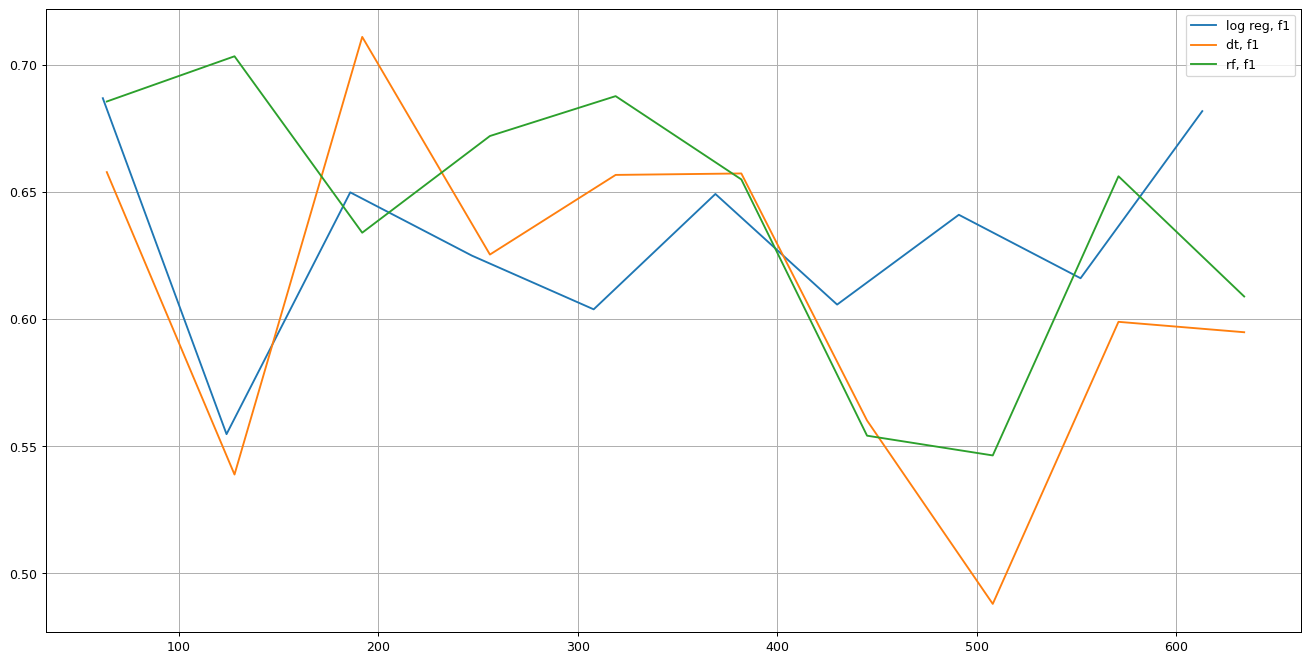

In [72]:
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(x_ticks_lr, lr_metrics[:, 0], label = "log reg, f1")
plt.plot(x_ticks_dt_rfc, dt_metrics[:, 0], label = "dt, f1")
plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 0], label = "rf, f1")
plt.grid()
plt.legend()

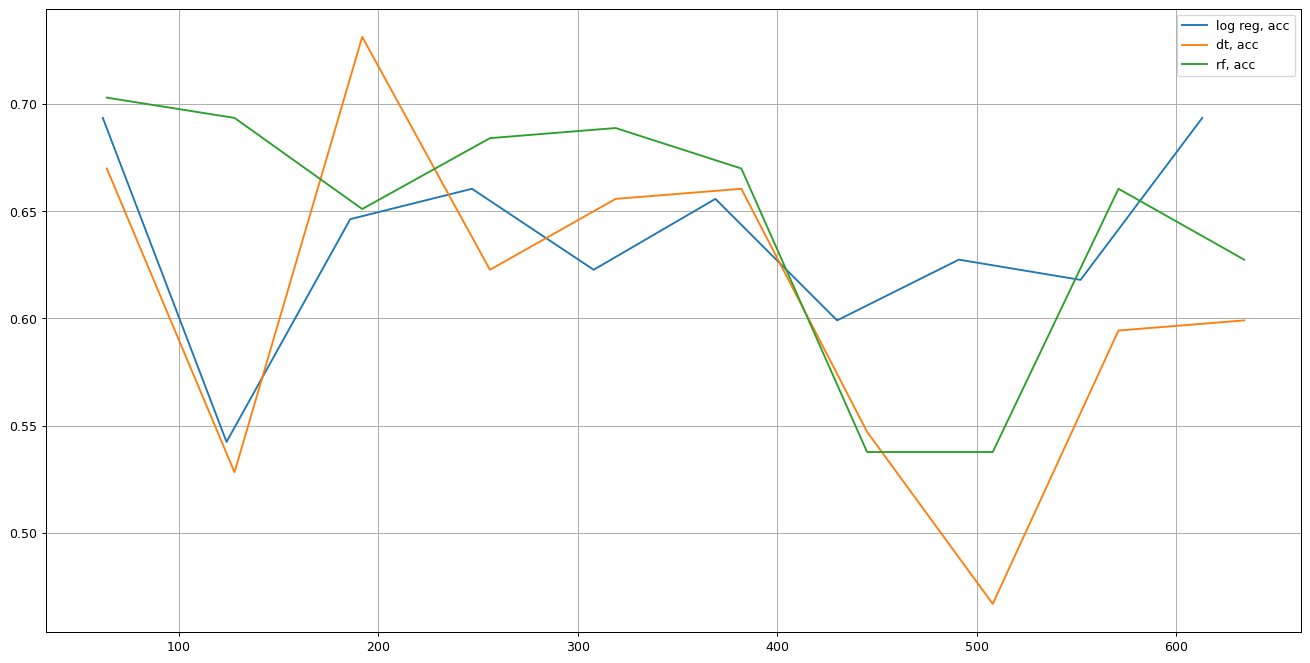

In [73]:
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(x_ticks_lr, lr_metrics[:, 1], label = "log reg, acc")
plt.plot(x_ticks_dt_rfc, dt_metrics[:, 1], label = "dt, acc")
plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 1], label = "rf, acc")
plt.grid()
plt.legend()